DB-Verbindung i.O.
SQL-DB erstellt
Daten erfolgreich importiert zu training_data.
Daten erfolgreich importiert zu ideal_functions.
Daten erfolgreich importiert zu test_data.
SQL-Tabellen erstellt
DB-Verbindung i.O.
Daten erfolgreich aus SQL übernommen
Best Fits gefunden
Max. Abweichungen gefunden
Validierte Testdaten erstellt
Testdaten validiert und in 'validated_test_results' gespeichert.


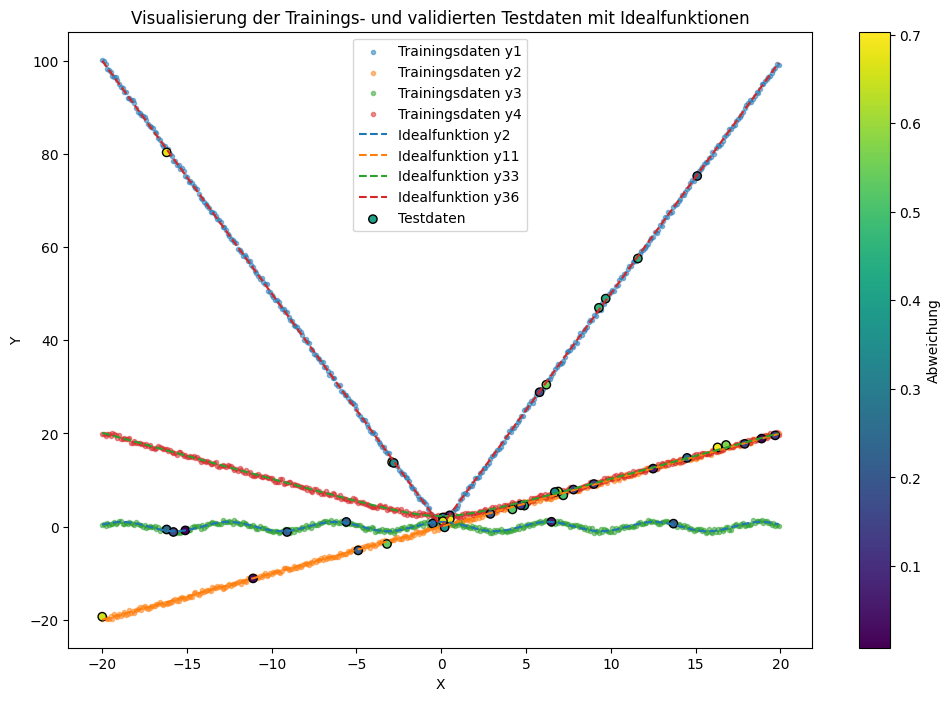

In [7]:
%run "Analysis.ipynb"
import matplotlib.pyplot as plt

# Pfad zur Datenbank
db_path = 'sqldatabase.sqlite'

# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect(db_path)

# Daten laden
train_df = pd.read_sql('SELECT * FROM training_data', conn)
ideal_df = pd.read_sql('SELECT * FROM ideal_functions', conn)
valid_test_results_df = pd.read_sql('SELECT * FROM validated_test_results', conn)

# Visualisierung vorbereiten
fig, ax = plt.subplots(figsize=(12, 8))

# Trainingsdaten plotten
for i in range(1, 5):
    ax.scatter(train_df['x'], train_df[f'y{i}'], label=f'Trainingsdaten y{i}', alpha=0.5, marker = ".")

# Idealfunktionen plotten, die den Trainingsdaten am besten entsprechen
for col in ideal_df.columns[1:]:  # Ignoriere die erste Spalte 'x'
    if col in valid_test_results_df['Ideale Funktion'].unique():
        ax.plot(ideal_df['x'], ideal_df[col], label=f'Idealfunktion {col}', linestyle='--')

# Testdaten mit Abweichungen plotten
scatter = ax.scatter(valid_test_results_df['x'], valid_test_results_df['y'], c=valid_test_results_df['Abweichung'], cmap='viridis', edgecolor='k', label='Testdaten')

# Farblegende für die Abweichungen hinzufügen
cbar = plt.colorbar(scatter)
cbar.set_label('Abweichung')

# Weitere Anpassungen
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Visualisierung der Trainings- und validierten Testdaten mit Idealfunktionen')
ax.legend()

# Visualisierung anzeigen
plt.show()